# Métricas de clasificación

**Desarrollado por:** Orlando Patricio Chacón Molina

**Fecha de creación:** 2022-02-19

**Fecha de actualización:** 2022-02-19

In [1]:
# Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score

from sklearn.model_selection import train_test_split 

In [2]:
filename = 'data/bank_modified.csv'
data = pd.read_csv(filename)
data.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [3]:
print('Clases:', np.unique(data['y_yes']))

Clases: [0 1]


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

In [5]:
X = data.drop(columns='y_yes')
y = data.iloc[:, -1].values

In [6]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(3616, 25)
(905, 25)


In [29]:
logReg = LogisticRegression(penalty='l2',C=0.5,solver='liblinear')
logReg.fit(X_train, y_train)

resultsTest = pd.DataFrame(y_test, columns=['expected'])
resultsTrain = pd.DataFrame(y_train, columns=['expected'])

resultsTest['predicted_l1_c1'] = logReg.predict(X_test)
resultsTrain['predicted_l1_c1'] = logReg.predict(X_train)


,expected,predicted_l1_c1
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
900,0,0
901,0,0
902,1,0
903,0,1


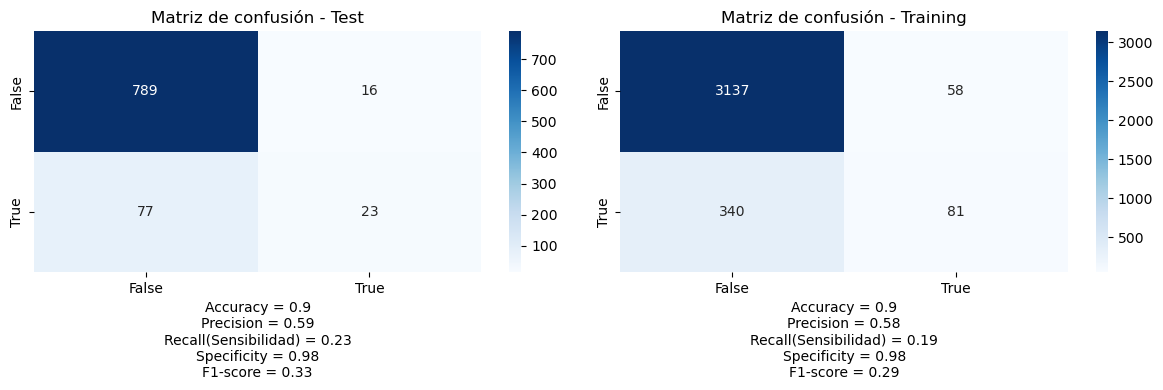

In [35]:
logReg = LogisticRegression(penalty='l2',C=1,solver='liblinear')
logReg.fit(X_train, y_train)

resultsTest = pd.DataFrame(y_test, columns=['expected'])
resultsTrain = pd.DataFrame(y_train, columns=['expected'])

resultsTest['predicted_l1_c1'] = logReg.predict(X_test)
resultsTrain['predicted_l1_c1'] = logReg.predict(X_train)


confTest = confusion_matrix(resultsTest['expected'], resultsTest['predicted_l1_c1'])
confTraining = confusion_matrix(resultsTrain['expected'], resultsTrain['predicted_l1_c1'])


plt.style.use('default')
fig,axes = plt.subplots(1,2,figsize=(12,4))


hmap = sns.heatmap(ax=axes[0],data=confTest,cmap='Blues',annot=True,fmt='g')
hmap.set_xticklabels(['False','True'])
hmap.set_yticklabels(['False','True'])
hmap.set_title('Matriz de confusión - Test')

tn, fp, fn, tp = confusion_matrix(resultsTest['expected'],resultsTest['predicted_l1_c1']).ravel()
acurracy = (tp + tn) / (tp + tn  + fp + fn)
precision = tp / (tp + fp)
specificity = tn / (tn + fp)
recall = tp / (tp+fn)
f1 = 2*(precision*recall)/(precision + recall)

metricsText = 'Accuracy = ' + str(round(acurracy,2))
metricsText += '\nPrecision = ' + str(round(precision,2))
metricsText += '\nRecall(Sensibilidad) = ' + str(round(recall,2))
metricsText += '\nSpecificity = ' + str(round(specificity,2))
metricsText += '\nF1-score = ' + str(round(f1,2))
hmap.set_xlabel(metricsText)

hmap = sns.heatmap(ax=axes[1],data=confTraining,cmap='Blues',annot=True,fmt='g')
hmap.set_xticklabels(['False','True'])
hmap.set_yticklabels(['False','True'])
hmap.set_title('Matriz de confusión - Training')

tn, fp, fn, tp = confusion_matrix(resultsTrain['expected'],resultsTrain['predicted_l1_c1']).ravel()
precision = tp / (tp + fp)
specificity = tn / (tn + fp)
recall = tp / (tp+fn)
f1 = 2*(precision*recall)/(precision + recall)

metricsText = 'Accuracy = ' + str(round(acurracy,2))
metricsText += '\nPrecision = ' + str(round(precision,2))
metricsText += '\nRecall(Sensibilidad) = ' + str(round(recall,2))
metricsText += '\nSpecificity = ' + str(round(specificity,2))
metricsText += '\nF1-score = ' + str(round(f1,2))
hmap.set_xlabel(metricsText)

fig.tight_layout()
